# Data Understanding & Data Preparation

### Import Data

In [1]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 28.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 34.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

client = 'TOOL_CLIENT.csv'
sales  = 'TOOL_SALES.csv'
joint = 'TOOL_JOINT.csv'

In [2]:
df_client = pd.read_csv(client)
df_sales = pd.read_csv(sales)

df = pd.merge(df_client, df_sales, on='CLIENT_ID')

# df = pd.read_csv(joint)

# lower case and replace spaces with underscores in column names
original_columns = df.columns
renamed_columns = [col.lower().replace(" ", "_") for col in original_columns]
column_mapping = dict(zip(original_columns, renamed_columns))
df.rename(columns=column_mapping, inplace=True)

df.head()

/tmp/ipykernel_864/751546178.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv(sales)


,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled
0,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,12585,0,C,937.94,P,XBXV2EB,XBXV2EB0102,NaN
1,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,13431,0,C,641.09,P,XBXV2AB,XBXV2AB0102,NaN
2,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,1380,0,C,0.00,P,XBXV2EB,XBXV2EB0102,NaN
3,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,202010,3493,1,C,1341.14,P,XBXV1AF,XBXV1AF0201,NaN
4,939,2005-11-15 00:00:00,LE,15500,2,681.26,E,3d,201705,8241,0,B,64.51,P,XAES4AA,XAES4AA0101,X


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050449 entries, 0 to 2050448
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   client_id           int64  
 1   client_create_date  object 
 2   region              object 
 3   trade_sector        int64  
 4   n_employees         int64  
 5   economic_pot        float64
 6   eco_pot_class       object 
 7   risk_cat            object 
 8   yyyymm              int64  
 9   item_id             int64  
 10  flg_tool            int64  
 11  sales_channel       object 
 12  net                 float64
 13  unit                object 
 14  family_code         object 
 15  group_code          object 
 16  cancelled           object 
dtypes: float64(2), int64(6), object(9)
memory usage: 265.9+ MB


In [3]:
# converting date columns to datetime
df['client_create_date'] = pd.to_datetime(df['client_create_date'])
df['yyyymm'] = pd.to_datetime(df['yyyymm'].astype(str), format='%Y%m')
df['client_id'] = df['client_id'].astype(str) # 
df['cancelled'] = df['cancelled'] == 'X'
df['unit'] = df['unit'] == 'P'

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050449 entries, 0 to 2050448
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   client_id           object        
 1   client_create_date  datetime64[ns]
 2   region              object        
 3   trade_sector        int64         
 4   n_employees         int64         
 5   economic_pot        float64       
 6   eco_pot_class       object        
 7   risk_cat            object        
 8   yyyymm              datetime64[ns]
 9   item_id             int64         
 10  flg_tool            int64         
 11  sales_channel       object        
 12  net                 float64       
 13  unit                bool          
 14  family_code         object        
 15  group_code          object        
 16  cancelled           bool          
dtypes: bool(2), datetime64[ns](2), float64(2), int64(4), object(7)
memory usage: 238.6+ MB


In [4]:
# Create a copy of the data
df_total = df.copy()

In [5]:
# Initial size of the data
df.shape

(2050449, 17)

In [6]:
# exporting the merged data

# df.to_csv('TOOL_JOINT.csv', index=False)

Create a new variable to identify client

Create a new variable to identify unique sales

In [6]:
# creating a new column for identifie the unique sales
df['sales_id'] = df['economic_pot'].astype(str) + '_' + df['yyyymm'].dt.strftime('%Y%m')

df.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled,sales_id
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,True,XBXV2EB,XBXV2EB0102,False,8659.81_201709
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,True,XBXV2AB,XBXV2AB0102,False,8659.81_201709
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,True,XBXV2EB,XBXV2EB0102,False,8659.81_201709
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,True,XBXV1AF,XBXV1AF0201,False,8659.81_202010
4,939,2005-11-15,LE,15500,2,681.26,E,3d,2017-05-01,8241,0,B,64.51,True,XAES4AA,XAES4AA0101,True,681.26_201705


In [10]:
# creating new dataframes with no canceled orders
no_canceled = df[df['cancelled'] == False]
print('Number of clients with no canceled orders:', no_canceled.shape)
print('Porcentage of no canceled/total:', (no_canceled.shape[0]/df.shape[0])*100)
no_canceled.head()

Number of clients with no canceled orders: (1947739, 18)
Porcentage of no canceled/total: 94.99085322287948


,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled,sales_id
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,True,XBXV2EB,XBXV2EB0102,False,8659.81_201709
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,True,XBXV2AB,XBXV2AB0102,False,8659.81_201709
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,True,XBXV2EB,XBXV2EB0102,False,8659.81_201709
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,True,XBXV1AF,XBXV1AF0201,False,8659.81_202010
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,True,XBSI4AA,XBSI4AA0101,False,681.26_201804


In [11]:
# checking the number of unique sales per client
client_sales_count = no_canceled.groupby('client_id')['sales_id'].nunique().sort_values(ascending=False)
print(client_sales_count)

client_id
51708    60
19562    58
9659     58
27926    58
37126    57
         ..
39817     1
7320      1
73199     1
56057     1
1         1
Name: sales_id, Length: 85714, dtype: int64


In [10]:
client_sales_count.describe()

count    85714.000000
mean         5.147432
std          6.579728
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max         60.000000
Name: sales_id, dtype: float64

In [12]:
# filtering the clients with more than one purchase - reactivation
client_sales_count.drop(client_sales_count[client_sales_count < 2].index, inplace=True)

pluri_client = no_canceled[no_canceled['client_id'].isin(client_sales_count.index)]
pluri_client['n_purchases'] = pluri_client.groupby('client_id')['sales_id'].transform('nunique')

print(pluri_client.shape)
print(pluri_client.info())

(1840920, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 1840920 entries, 0 to 2048901
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   client_id           object        
 1   client_create_date  datetime64[ns]
 2   region              object        
 3   trade_sector        int64         
 4   n_employees         int64         
 5   economic_pot        float64       
 6   eco_pot_class       object        
 7   risk_cat            object        
 8   yyyymm              datetime64[ns]
 9   item_id             int64         
 10  flg_tool            int64         
 11  sales_channel       object        
 12  net                 float64       
 13  unit                bool          
 14  family_code         object        
 15  group_code          object        
 16  cancelled           bool          
 17  sales_id            object        
 18  n_purchases         int64         
dtypes: bool(2), datetime64[ns](2), fl

/tmp/ipykernel_864/2084113973.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client['n_purchases'] = pluri_client.groupby('client_id')['sales_id'].transform('nunique')


In [31]:
pluri_client.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,family_code,group_code,sales_id,n_purchases
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,XBXV2EB,XBXV2EB0102,8659.81_201709,2
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,XBXV2AB,XBXV2AB0102,8659.81_201709,2
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,XBXV2EB,XBXV2EB0102,8659.81_201709,2
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,XBXV1AF,XBXV1AF0201,8659.81_202010,2
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,XBSI4AA,XBSI4AA0101,681.26_201804,7


In [45]:
# Flag Tool
pluri_client['risk_cat'].value_counts()

risk_cat
2a    1070830
3a     293850
3d     248862
T8     116884
4d      18158
5d      17538
3b      15433
5a      11064
2b       8989
2d       8581
4c       7997
3c       7087
4a       4682
1a       4394
4b       3508
1d       1257
2c        586
5b        585
5c        353
1b        282
Name: count, dtype: int64

In [34]:
for c in pluri_client.columns:
    print(c)
    print(pluri_client[c].value_counts())

client_id
client_id
49196    2616
51708     991
48195     736
48285     694
45393     633
         ... 
47396       1
62161       1
77664       1
24276       1
18499       1
Name: count, Length: 55336, dtype: int64
client_create_date
client_create_date
2005-11-15    331668
2005-11-16    234267
2007-06-03      9813
2007-06-05      5447
2007-06-06      5425
               ...  
2020-04-23         2
2021-10-20         2
2008-08-22         2
2020-04-09         2
2021-04-23         2
Name: count, Length: 4014, dtype: int64
region
region
RM    75707
MI    72866
FI    68186
BO    55254
TO    53364
      ...  
2A       27
03       25
06        8
08        6
ST        3
Name: count, Length: 115, dtype: int64
trade_sector
trade_sector
11000    645980
13500    267050
21100    224283
22100    138838
15100     81023
          ...  
38000         9
37420         8
39700         6
39000         4
12100         2
Name: count, Length: 145, dtype: int64
n_employees
n_employees
1       364654
2       293

We have now a new dataset cointaining only client with more than one purchase

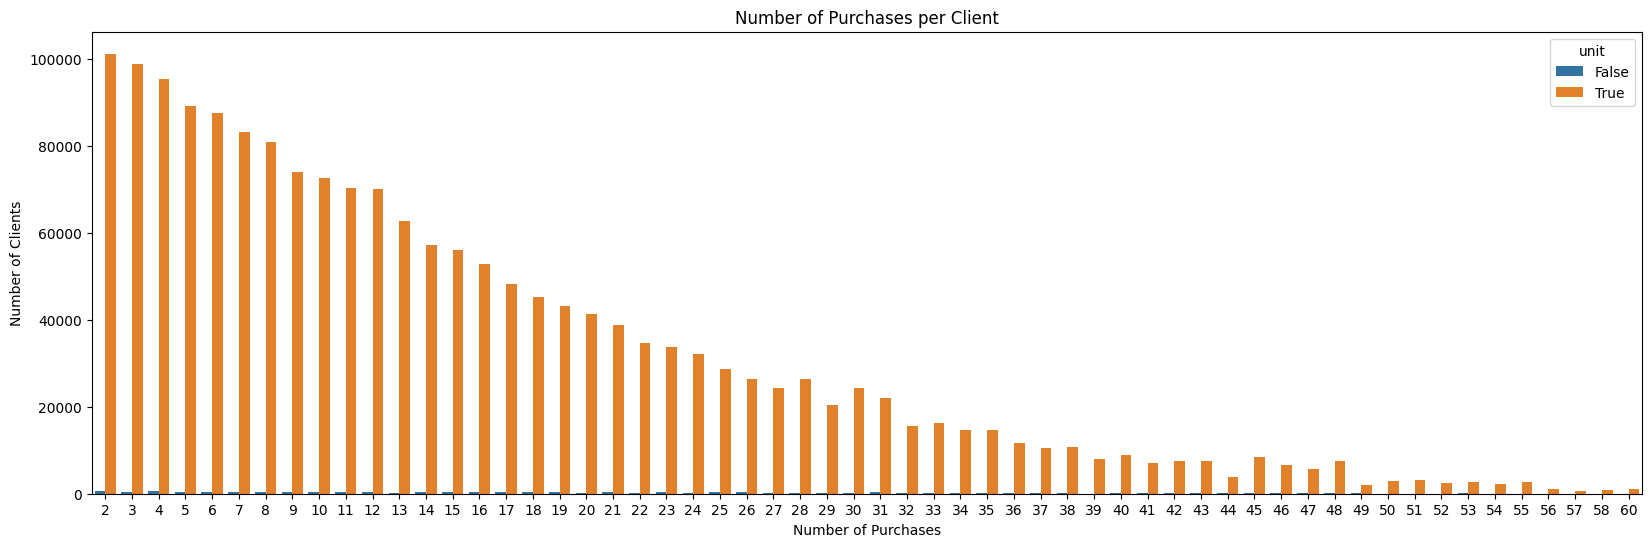

In [43]:
plt.figure(figsize=(20, 6))
sns.countplot(x='n_purchases', data=pluri_client, hue='unit')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Clients')
plt.title('Number of Purchases per Client')
plt.show()

On this point I'd like asking business about articles that aren't "Unit". I suppose that could be substitute parts for other articles or similar, which a client buys because it absolutly needs it and a marketing campaign about is unuseful. So I decide to drop rows containing non-piece units

In [13]:
# dropping unnecessary columns
pluri_client.drop(pluri_client[pluri_client['unit'] == False].index, inplace=True)
pluri_client.drop('unit', axis=1, inplace=True)
pluri_client.drop('cancelled', axis=1, inplace=True)

pluri_client.head()

/tmp/ipykernel_864/4086462661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client.drop(pluri_client[pluri_client['unit'] == False].index, inplace=True)
/tmp/ipykernel_864/4086462661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client.drop('unit', axis=1, inplace=True)
/tmp/ipykernel_864/4086462661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client.drop('cancelled', axis=1, inplace=True)


,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,family_code,group_code,sales_id,n_purchases
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,XBXV2EB,XBXV2EB0102,8659.81_201709,2
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,XBXV2AB,XBXV2AB0102,8659.81_201709,2
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,XBXV2EB,XBXV2EB0102,8659.81_201709,2
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,XBXV1AF,XBXV1AF0201,8659.81_202010,2
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,XBSI4AA,XBSI4AA0101,681.26_201804,7


In [14]:
pluri_client.shape

(1827763, 17)

### Next steps: 
- Days since last purchase for same client
- Analyze time between purchases

- Create a DF with total amount for each sales_id

In [15]:
# extracting new variables
sales_net = pluri_client.groupby('sales_id')['net'].sum()   # total sales per sale
sales_n_purchases = pluri_client.groupby('sales_id')['n_purchases'].max()   # number of purchases per sale

sales_time = pluri_client[['sales_id', 'client_id', 'yyyymm']].drop_duplicates().set_index('client_id')   # time of the sale
sales_time = sales_time.sort_values(by=['client_id', 'yyyymm'])

sales_time['time_diff'] = sales_time.groupby('client_id')['yyyymm'].diff().dt.days / 365.25 # time between sales in years
sales_id_time_diff = sales_time[['sales_id', 'time_diff']].set_index('sales_id')    # time between sales per sale (to easly merge with the main dataframe)

In [16]:
# adding the new variables to the main dataframe
pluri_client['sales_net'] = pluri_client['sales_id'].map(sales_net)
pluri_client['time_diff'] = pluri_client['sales_id'].map(sales_id_time_diff['time_diff'].to_dict())
pluri_client.head()

/tmp/ipykernel_864/278983237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client['sales_net'] = pluri_client['sales_id'].map(sales_net)
/tmp/ipykernel_864/278983237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client['time_diff'] = pluri_client['sales_id'].map(sales_id_time_diff['time_diff'].to_dict())


,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,family_code,group_code,sales_id,n_purchases,sales_net,time_diff
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,XBXV2EB,XBXV2EB0102,8659.81_201709,2,186810.74,0.251882
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,XBXV2AB,XBXV2AB0102,8659.81_201709,2,186810.74,0.251882
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,XBXV2EB,XBXV2EB0102,8659.81_201709,2,186810.74,0.251882
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,XBXV1AF,XBXV1AF0201,8659.81_202010,2,226206.91,0.082136
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,XBSI4AA,XBSI4AA0101,681.26_201804,7,3365.17,NaN


In [51]:
sales_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409520 entries, 10 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   sales_id   409520 non-null  object        
 1   yyyymm     409520 non-null  datetime64[ns]
 2   time_diff  354184 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 12.5+ MB


In [17]:
# creating a new dataframe for sales
sales_net = sales_net.reset_index()
sales_n_purchases = sales_n_purchases.reset_index()
sales_time.reset_index(inplace=True)

merged = pd.merge(sales_time, sales_net, on='sales_id')
sales = pd.merge(merged, sales_n_purchases, on='sales_id')

df_original = df
df = pluri_client

In [18]:
# adding the new variables to the sales dataframe
sales_columns = ['region', 'trade_sector', 'n_employees', 'economic_pot',
                 'eco_pot_class', 'risk_cat', 'flg_tool', 'sales_channel', 'sales_id']  # columns to be added to the sales dataframe

for c in sales_columns: # adding the columns to the sales dataframe
    col = df.groupby('sales_id')[c].first()
    sales = pd.merge(sales, col, left_on='sales_id', right_index=True)

sales.drop(['sales_id_x', 'sales_id_y'], axis=1, inplace=True)

In [64]:
sales.head(25)

,sales_id,client_id,yyyymm,time_diff,net,n_purchases,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,flg_tool,sales_channel
0,7000.0_201904,10,2019-04-01,NaN,147891.1,56,BL,21100,3,7000.0,D,2a,0,D
1,7000.0_201904,10342,2019-04-01,0.580424,147891.1,56,BL,21100,3,7000.0,D,2a,0,D
2,7000.0_201904,10365,2019-04-01,0.246407,147891.1,56,BL,21100,3,7000.0,D,2a,0,D
3,7000.0_201904,10498,2019-04-01,0.161533,147891.1,56,BL,21100,3,7000.0,D,2a,0,D
4,7000.0_201904,10564,2019-04-01,0.750171,147891.1,56,BL,21100,3,7000.0,D,2a,0,D
5,7000.0_201904,10628,2019-04-01,0.084873,147891.1,56,BL,21100,3,7000.0,D,2a,0,D
6,7000.0_201904,10636,2019-04-01,0.246407,147891.1,56,BL,21100,3,7000.0,D,2a,0,D
7,7000.0_201904,10754,2019-04-01,0.084873,147891.1,56,BL,21100,3,7000.0,D,2a,0,D
8,7000.0_201904,11170,2019-04-01,0.084873,147891.1,56,BL,21100,3,7000.0,D,2a,0,D
9,7000.0_201904,11320,2019-04-01,0.413415,147891.1,56,BL,21100,3,7000.0,D,2a,0,D


In [67]:
sales['sales_id'].value_counts()['7000.0_201904']

316

In [65]:
sales['sales_channel'].value_counts()['D']

55474

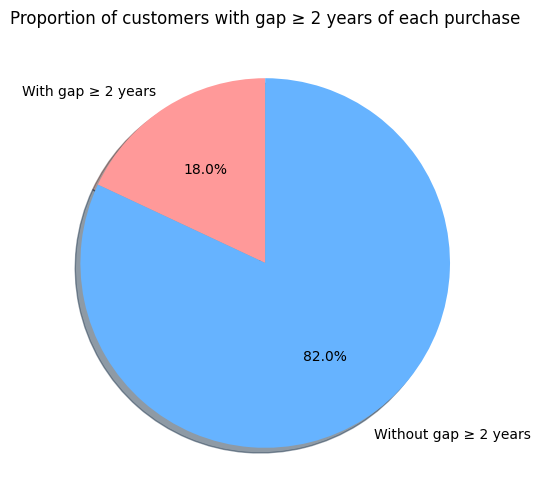

In [56]:
# Filter clients with at least one gap ≥ 2 years
clients_with_gaps = sales[sales['time_diff'] >= 2]['client_id'].unique()

# Count clients with and without gaps
total_clients = sales['client_id'].nunique()
clients_with_gaps_count = len(clients_with_gaps)
clients_without_gaps_count = total_clients - clients_with_gaps_count

# Prepare data for the pie chart
labels = ['With gap ≥ 2 years', 'Without gap ≥ 2 years']
sizes = [clients_with_gaps_count, clients_without_gaps_count]
colors = ['#ff9999', '#66b3ff']

# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title('Proportion of customers with gap ≥ 2 years of each purchase')
plt.show()

P.S. de-comment the follow cell to save files

In [23]:
# sales.to_csv('sales.csv', index=False)
# pluri_client.to_csv('TOOLS_PREP.csv', index=False)

Now we have 2 DataFrame to use for our analysis
- df: the complete DataFrame with all the variables
- sales: the DataFrame with the details of sales

## Working on association rules

In [27]:
# one-hot encoding the itemsets for the apriori algorithm
itemsets_series = df.groupby('client_id')['item_id'].apply(list)
encoder = TransactionEncoder()
itemsets = itemsets_series.tolist()

onehot = encoder.fit_transform(itemsets, sparse=True)
onehot = pd.DataFrame.sparse.from_spmatrix(onehot, columns = encoder.columns_)
onehot.columns = [str(col) for col in onehot.columns]
onehot.info()

frequent_itemsets = apriori(onehot, min_support=0.01, max_len = 4, use_colnames=True, low_memory=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)
print(len(rules))

/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_25713/1688585632.py:7: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  onehot = pd.DataFrame.sparse.from_spmatrix(onehot, columns = encoder.columns_)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55336 entries, 0 to 55335
Columns: 14048 entries, 1 to 14581
dtypes: Sparse[bool, 0](14048)
memory usage: 6.0 MB
46662


In [51]:
# filtering and ordering the rules
rules.sort_values(by=['support', 'confidence'], ascending=False, inplace=True)
print('We have a total of {} rules'.format(rules.shape[0]))
rules.head(20)

We have a total of 46662 rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
269,(3351),(585),0.368675,0.421118,0.308100,0.835694,1.984465,1.0,0.152844,3.523200,0.785785,0.639617,0.716167,0.783658
270,(585),(3351),0.421118,0.368675,0.308100,0.731623,1.984465,1.0,0.152844,2.352377,0.856973,0.639617,0.574898,0.783658
810,(1737),(1716),0.193689,0.199689,0.187238,0.966692,4.840981,1.0,0.148560,24.027259,0.984026,0.908302,0.958381,0.952169
811,(1716),(1737),0.199689,0.193689,0.187238,0.937647,4.840981,1.0,0.148560,12.931395,0.991403,0.908302,0.922669,0.952169
271,(3352),(585),0.202057,0.421118,0.165823,0.820678,1.948806,1.0,0.080734,3.228168,0.610150,0.362573,0.690227,0.607223
272,(585),(3352),0.421118,0.202057,0.165823,0.393769,1.948806,1.0,0.080734,1.316237,0.841045,0.362573,0.240258,0.607223
183,(917),(585),0.193256,0.421118,0.160691,0.831494,1.974491,1.0,0.079308,3.435384,0.611768,0.354192,0.708912,0.606538
184,(585),(917),0.421118,0.193256,0.160691,0.381582,1.974491,1.0,0.079308,1.304529,0.852576,0.354192,0.233440,0.606538
638,(917),(3351),0.193256,0.368675,0.142565,0.737703,2.000959,1.0,0.071317,2.406912,0.620072,0.339955,0.584530,0.562200
639,(3351),(917),0.368675,0.193256,0.142565,0.386697,2.000959,1.0,0.071317,1.315408,0.792364,0.339955,0.239780,0.562200


## Model

In [ ]:
# Step 1: Identify clients with at least one gap ≥ 2 years
clients_with_gaps = sales[sales['time_diff'] >= 2]['client_id']

# Step 2: Create target column
sales['target'] = sales['client_id'].apply(lambda x: 1 if x in clients_with_gaps else 0)

In [20]:
# Step 3: Check results
sales[['client_id', 'time_diff', 'target']].head()

,client_id,time_diff,target
0,10,NaN,0
1,10342,0.580424,0
2,10365,0.246407,0
3,10498,0.161533,0
4,10564,0.750171,0


In [21]:
# Creating a target
X = sales
y = sales['target']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select numerical columns for SelectKBest
numerical_features = sales.select_dtypes(include=['int64', 'float64']).columns.drop('target')

sales['yyyymm'] = sales['yyyymm'].astype(str)

# Apply SelectKBest
X = sales[numerical_features]
y = sales['target']

selector = SelectKBest(score_func=f_classif, k='all')  # Select all features for ranking
X_selected = selector.fit(X, y)

# Show feature scores
feature_scores = pd.DataFrame({'Feature': numerical_features, 'Score': X_selected.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importance = pd.DataFrame({'Feature': numerical_features, 'Importance': rf.feature_importances_})
print(feature_importance.sort_values(by='Importance', ascending=False))

        Feature  Importance
0     time_diff    0.680359
1           net    0.175961
2   n_purchases    0.043510
5  economic_pot    0.041049
3  trade_sector    0.025557
4   n_employees    0.023636
6      flg_tool    0.009927
